Calculating the Hausdorff distances...
	diameter = 1.0E+00, distance = 2.14E-04
	diameter = 1.0E-01, distance = 2.66E-05
	diameter = 1.0E-02, distance = 2.68E-06
	diameter = 1.0E-03, distance = 2.68E-07
	diameter = 1.0E-04, distance = 2.68E-08
	diameter = 1.0E-05, distance = 2.68E-09
Done!


Slope:0.9855522913247374 intercept:-3.6249409217234163


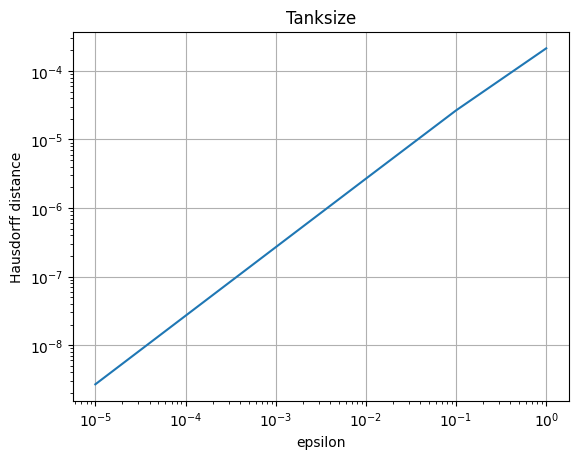

Tanksize executed


In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from pyomo.opt import SolverFactory, TerminationCondition
from src.analyses.value_function import ValueFunction
from src.analyses.convergence_analysis import HausdorffAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from scipy.optimize import curve_fit
def get_critical_width(alg,y_optimal,k=1,abs_epsilon=0.01):
    haus=HausdorffAnalyzer(alg)
    print(f"width: {abs_epsilon/k}")
    print(haus._gen_interval(y_optimal,abs_epsilon/k))
def linear_func(x, a, b):
        return a * x + b
def convergence_analysis(alg,fixed_pt,optimal_sol,start=-5,stop=0,steps=6,name="instance"):

    haus=HausdorffAnalyzer(alg)
    eps_list, distances=haus.analyze(y=fixed_pt, v=optimal_sol,
                    eps_min= start, eps_max = stop, steps= steps,
                    y_optimal= True)
    log_eps = np.log10(eps_list)
    log_distances = np.log10(distances)

    # Perform curve fitting
    params, _ = curve_fit(linear_func, log_eps, log_distances)
    print(f"Slope:{params[0]} intercept:{params[1]}")
    plt.loglog(eps_list, distances)
    plt.grid()
    plt.xticks(np.logspace(start, stop, steps))
    plt.xlabel("epsilon")
    plt.ylabel("Hausdorff distance")
    plt.title(name)
    plt.show()
from NSPLIB.src.instances.tanksize.tanksize import const_model
tanksize_obj = 0.9030394623070541
tanksize_sol = {"productTankSize[1]": 659.2053849850757, "productTankSize[2]": 552.3954188143167, "productTankSize[3]": 225.73997707963284}
tankszie_y_bound = {"productTankSize[1]": [643, 4018.36], "productTankSize[2]": [536, 3348], "productTankSize[3]": [214, 1339.45]}
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
alg=CaoZavalaAlgo(m,solver="baron")

convergence_analysis(alg,tanksize_sol,tanksize_obj,start=-5,stop=0,steps=6,name="Tanksize")
print("Tanksize executed")